# Decision Tree Modeling

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer

import warnings
warnings.filterwarnings("ignore")

# 1.1 Load Data

In [2]:
# non-engineered data
df = pd.read_csv("train.csv")

# engineered data
df_eng = pd.read_csv("train_engineered.csv")

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,Spondylolisthesis
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,Hernia
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Spondylolisthesis
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal


In [3]:
df_eng.head()

,lumbar_lordosis_angle,pelvic_radius,class__Hernia,class__Normal,class__Spondylolisthesis
0,85.101608,125.593624,0,0,1
1,48.136806,111.916007,0,0,1
2,35.872660,116.559771,1,0,0
3,84.620272,117.307897,0,0,1
4,46.902096,129.220682,0,1,0


# 1.2 One Hot Encode Target Variable

In [4]:
# ohe non-engineered data
dummies = pd.get_dummies(df["class"], prefix="class_")
df.drop("class", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class__Hernia,class__Normal,class__Spondylolisthesis
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,1
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,0,0,1
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,1,0,0
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,1
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0,1,0


# 2.1 Preprocessing

Here I will seperate the independent and dependent variables. I will also scale the independent variables.

In [5]:
# seperate independent and dependent variables

targets = [col for col in df if col.startswith("class")]

# non-engineered data
X = df.drop(targets, axis=1)
y_hernia = df["class__Hernia"]
y_spond = df["class__Spondylolisthesis"]

# engineered data
Xe = df_eng.drop(targets, axis=1)
ye_hernia = df_eng["class__Hernia"]
ye_spond = df_eng["class__Spondylolisthesis"]

X.shape, y_hernia.shape, y_spond.shape, Xe.shape, ye_hernia.shape, ye_spond.shape

((279, 6), (279,), (279,), (279, 2), (279,), (279,))

In [6]:
# scale data
sc = StandardScaler()

# non-engineered data
X = sc.fit_transform(X)

# engineered data
Xe = sc.fit_transform(Xe)

# 3.1 Baseline Models

Here I will look at the baseline performance of the default LogisticRegression model on the data sets. I will use cross validation.

In [7]:
# instantiate the default logistic regression model
clf = DecisionTreeClassifier()

In [8]:
# create a function to print desired scores
scorers = [make_scorer(g) for g in [recall_score, precision_score, accuracy_score]]

def find_scores(classifier, X, y, scorers):
    for scorer, score_type in zip(scorers, ["recall", "precision", "accuracy"]):
        print(f"\n\n{score_type}")
        results = cross_validate(clf, X, y, scoring=scorer, cv=4)["test_score"]
        print(results)
        print("avg:", sum(results)/4)
        print("var:", np.array(results).var())

# run function on non-engineered data pertaining to hernias
find_scores(clf, X, y_hernia, scorers)



recall
[0.42857143 0.57142857 0.38461538 0.61538462]
avg: 0.5
var: 0.009207825141891076


precision
[0.53846154 0.69230769 0.5        0.6       ]
avg: 0.5826923076923077
var: 0.005277366863905324


accuracy
[0.83098592 0.8        0.82608696 0.86956522]
avg: 0.8316595223515003
var: 0.0006176685770256662


In [9]:
# find scores for non-engineered data pertaining to Spondylolisthesis
find_scores(clf, X, y_spond, scorers)



recall
[0.94117647 0.85294118 0.91176471 0.96969697]
avg: 0.9188948306595365
var: 0.0018695129972261162


precision
[0.94117647 0.96774194 0.94117647 0.96774194]
avg: 0.9544592030360531
var: 0.00017643098128031337


accuracy
[0.94285714 0.94285714 0.97142857 0.94202899]
avg: 0.9497929606625259
var: 0.00015614752517264014


In [10]:
# find scores for engineered data pertaining to hernia
find_scores(clf, Xe, ye_hernia, scorers)



recall
[0.42857143 0.42857143 0.30769231 0.23076923]
avg: 0.3489010989010989
var: 0.00708700640019321


precision
[0.46153846 0.35294118 0.57142857 0.25      ]
avg: 0.4089770523594053
var: 0.014391730086569954


accuracy
[0.78873239 0.72857143 0.8115942  0.75362319]
avg: 0.7706303035604933
var: 0.0010159794179368316


In [11]:
# find scores for engineered data pertaining to Spondylolisthesis
find_scores(clf, Xe, ye_spond, scorers)



recall
[0.70588235 0.67647059 0.82352941 0.78787879]
avg: 0.7484402852049912
var: 0.003546146825283342


precision
[0.82142857 0.71875    0.75       0.78787879]
avg: 0.7695143398268398
var: 0.0014975420129957964


accuracy
[0.74285714 0.72857143 0.77142857 0.79710145]
avg: 0.7599896480331263
var: 0.0006971905019096489


Overall the non-engineered data seemed to work the best so far.

# 4.1 Hyper paramerer tuning

Now I will tune the hyper parameters for the models. From now on I am only concerned with the non-engineered data.

In [12]:
# explore parameter tuning for finding hernias
params = {"max_depth":[2,3,4,5,None]}
gscv = GridSearchCV(clf, params, cv=4)
gscv.fit(X, y_hernia)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [13]:
print(gscv.best_estimator_.get_params()["max_depth"])

5


In [14]:
# baseline scores
find_scores(clf, X, y_hernia, scorers)



recall
[0.64285714 0.35714286 0.53846154 0.69230769]
avg: 0.5576923076923077
var: 0.016491063881173773


precision
[0.69230769 0.625      0.45454545 0.6       ]
avg: 0.5929632867132867
var: 0.007526168379260599


accuracy
[0.81690141 0.82857143 0.84057971 0.85507246]
avg: 0.835281252733794
var: 0.00020065152532578807


In [15]:
# after tuning
find_scores(gscv.best_estimator_, X, y_hernia, scorers)



recall
[0.35714286 0.35714286 0.30769231 0.61538462]
avg: 0.40934065934065933
var: 0.014558930080908104


precision
[0.61538462 0.66666667 0.53846154 0.53333333]
avg: 0.5884615384615384
var: 0.0030950032873109795


accuracy
[0.84507042 0.82857143 0.86956522 0.85507246]
avg: 0.849569883066515
var: 0.00022281800634817574


In [16]:
# explore parameter tuning for finding hernias
gscv2 = GridSearchCV(clf, params, cv=4)
gscv2.fit(X, y_spond)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [17]:
print(gscv2.best_estimator_.get_params()["max_depth"])

2


In [18]:
# baseline scores
find_scores(clf, X, y_spond, scorers)



recall
[0.94117647 0.88235294 0.91176471 0.93939394]
avg: 0.9186720142602496
var: 0.0005756586786391766


precision
[0.91428571 0.96774194 0.93939394 0.96969697]
avg: 0.9477796397151236
var: 0.0005177564041099058


accuracy
[0.92857143 0.92857143 0.94285714 0.94202899]
avg: 0.9355072463768115
var: 4.8191299203991214e-05


In [19]:
# after tuning
find_scores(gscv2.best_estimator_, X, y_spond, scorers)



recall
[0.94117647 0.91176471 0.97058824 0.96969697]
avg: 0.948306595365419
var: 0.0005850419895717166


precision
[0.94117647 0.96666667 0.94444444 0.96969697]
avg: 0.9554961378490789
var: 0.00016340928420198675


accuracy
[0.94285714 0.92857143 0.94285714 0.94202899]
avg: 0.93907867494824
var: 3.691504957370443e-05


# 5.1 Feature Importance

Here I will take a look at the coefficients of each feature.

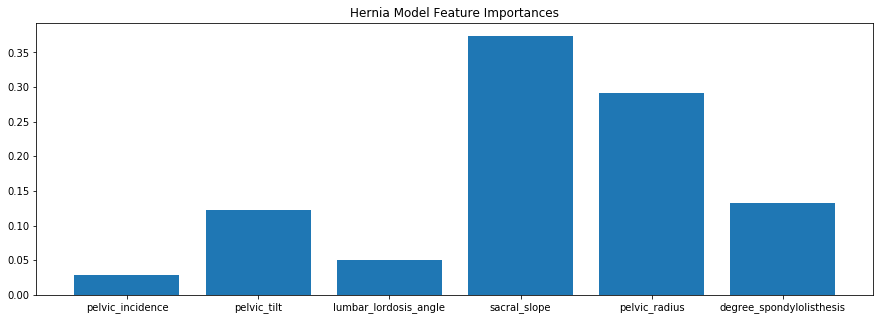

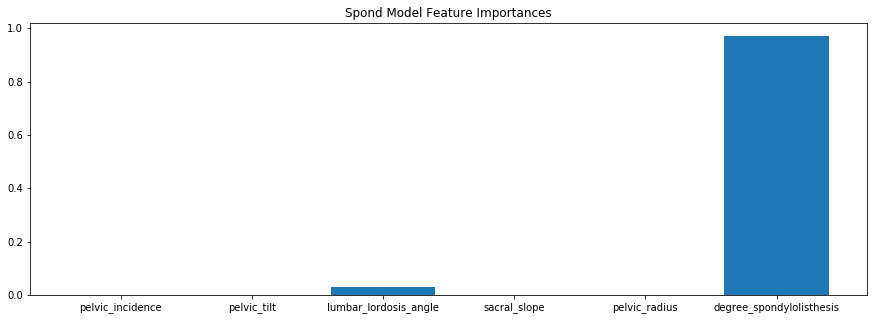

In [23]:
# save models
model_hernia = gscv.best_estimator_
model_spond = gscv2.best_estimator_

# save coeficients
cols = df.drop(targets, axis=1).columns
imp_hernia = model_hernia.feature_importances_
imp_spond = model_spond.feature_importances_


# plotting
plt.figure(figsize=(15, 5))
plt.bar(cols, imp_hernia)
plt.title("Hernia Model Feature Importances")
plt.show()

print("\n\n\n")

plt.figure(figsize=(15, 5))
plt.bar(cols, imp_spond)
plt.title("Spond Model Feature Importances")
plt.show()